In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pickle

In [41]:
data = pd.read_csv("patient_dataset.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [42]:
# Generating Dataset Details: columns, datatypes, non-null row count  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [43]:
# Generating Summary Statistics for numeric columns: row count, min, max, mean values etc.
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [44]:
#Converting Non-numeric columns to Numeric using Ordinal Encoding for Gender and Smoking History
encoder=OrdinalEncoder()
data["smoking_history"]=encoder.fit_transform(data[["smoking_history"]])
data["gender"]=encoder.fit_transform(data[["gender"]])

In [45]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


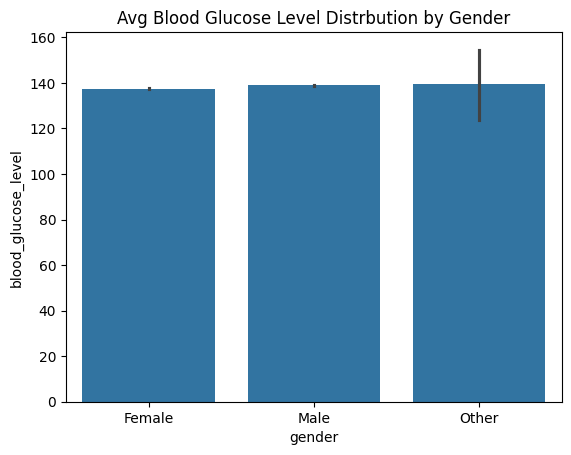

In [46]:
sns.barplot(data=data, x='gender', y='blood_glucose_level')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male','Other'])
plt.title("Avg Blood Glucose Level Distrbution by Gender")
plt.show()

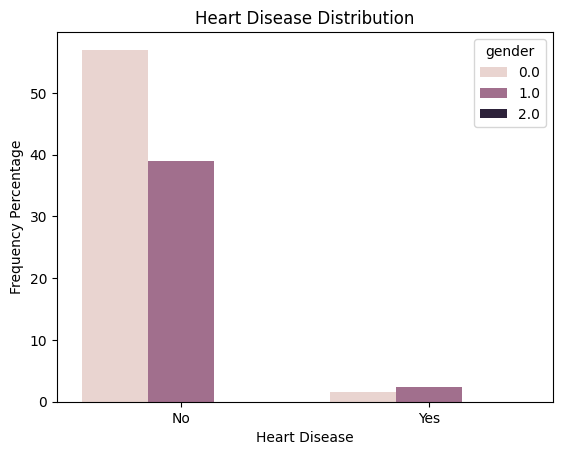

In [47]:
sns.countplot(data=data, x='heart_disease', hue='gender', stat='percent')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title("Heart Disease Distribution")
plt.xlabel('Heart Disease')
plt.ylabel('Frequency Percentage')
plt.show()

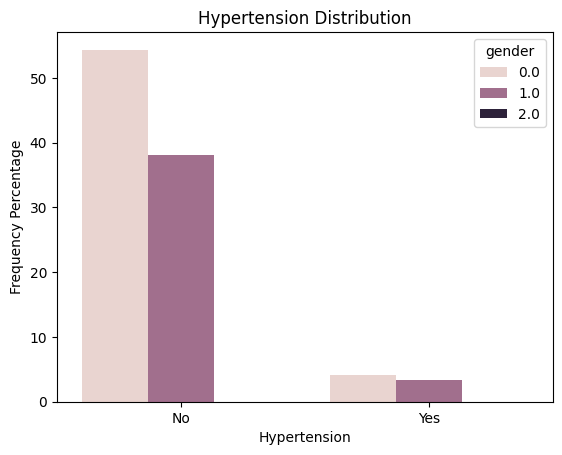

In [48]:
sns.countplot(data=data, x='hypertension', hue='gender', stat='percent')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title("Hypertension Distribution")
plt.xlabel('Hypertension')
plt.ylabel('Frequency Percentage')
plt.show()

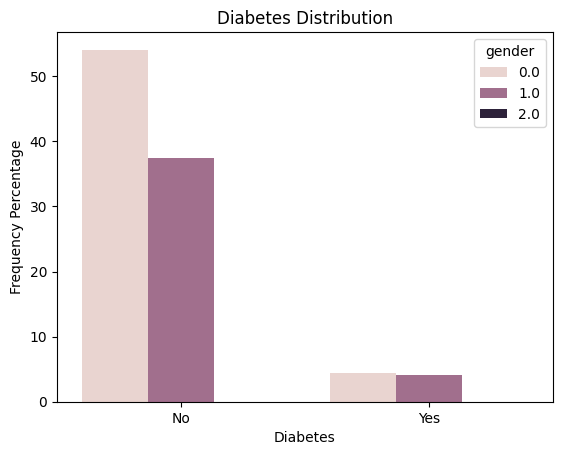

In [49]:
sns.countplot(data=data, x='diabetes', hue='gender', stat='percent')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.title("Diabetes Distribution")
plt.xlabel('Diabetes')
plt.ylabel('Frequency Percentage')
plt.show()

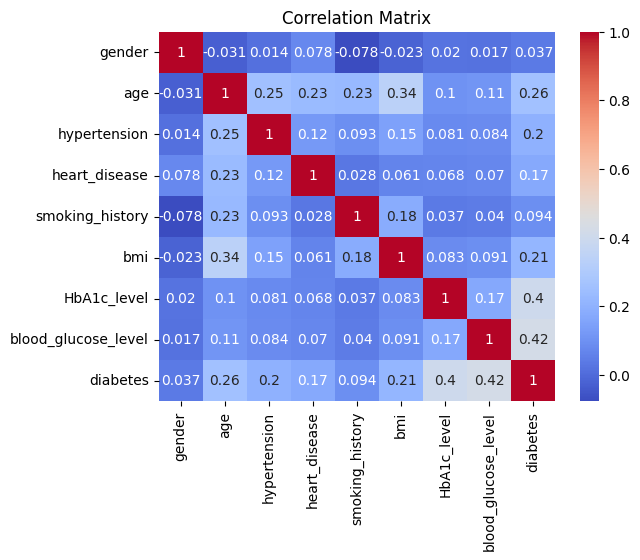

In [50]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [51]:
#Set Target Variables
X = data.drop("diabetes",axis=1)
y =data["diabetes"]

In [52]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.9706666666666667


In [53]:
with open("diabetes_predictor.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
print("Model Saved Successfully!")

Model Saved Successfully!
